### Bitcoin Price Historical Data- Time Series


The variable 'months' refers to the number of months that have passed.  The first value of variable 'months' is the initial price of the Bitcoin. The variable 'price' refers to the average price of 1 bitcoin for that month in USD. 


This is a smoothing technique assignment where you have to forecast the value of bitcoins in USD using the different smoothing techniques. 

 

The overall data you have is for 32 months (starting index is 0, therefore 31 rows in total). Divide this data into train data (first 29 months) and test data (last 3 months). Please make sure that the train and test data is as per the instructions.

In [1]:
## Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Read & Understand Dataset

df = pd.read_csv("bitcoinfinal.csv")

In [3]:
df.head()

,0,217.4
0,1,255.7
1,2,244.3
2,3,236.1
3,4,228.7
4,5,262.9


In [5]:
df.columns = ["months", "price"]

In [6]:
df.head()

,months,price
0,1,255.7
1,2,244.3
2,3,236.1
3,4,228.7
4,5,262.9


In [11]:
df = df.set_index(df["months"])
df.head()

,months,price
months,,
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7
5,5,262.9


In [12]:
df.drop(["months"], axis=1, inplace = True)

In [13]:
df.head()

,price
months,
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9


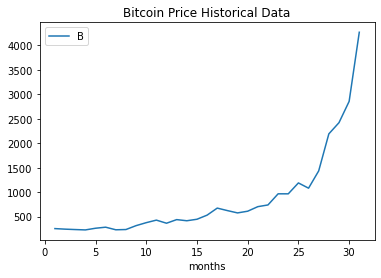

In [18]:
df.plot()
plt.title("Bitcoin Price Historical Data")
plt.legend("Best")

In [45]:
train_len = 29
train = df[0:train_len] 
test = df[train_len:] 

In [46]:
train.tail()

,price
months,
25,1189.1
26,1081.7
27,1435.2
28,2191.8
29,2420.7


In [47]:
test.tail()

,price
months,
30,2856.0
31,4268.8


#### Q1. What is the predicted value(upto two decimal places) using Naive and Simple Average Forecasting method respectively for the 30th Month?

In [48]:
##### 1. Naive method

y_hat_naive = test.copy()
y_hat_naive["naive forecast"] = train["price"][train_len-1]
y_hat_naive

,price,naive forecast
months,,
30,2856.0,2191.8
31,4268.8,2191.8


In [49]:
### 2. Simple Average Forecasting

y_hat_avg = test.copy()
y_hat_avg["Average Forecast"] = train["price"].mean()
y_hat_avg

,price,Average Forecast
months,,
30,2856.0,671.727586
31,4268.8,671.727586


#### Q2.  Which model would you prefer here out of Naive and Simple Average to forecast future values?

In [51]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_naive['naive forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_naive['naive forecast'])/test['price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1541.93,35.96


In [52]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_avg['Average Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_avg['Average Forecast'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1541.93,35.96
0,Simple average method,2975.73,80.37


###  Q3. In the same dataset, you will have to perform the following three steps:

1. Forecast the average bitcoin price for the months 30 to 32, using the Simple Moving Average forecast method with a window size of 12 months.

2. Forecast the average bitcoin price for the months 30 to 32, using the Simple Moving Average forecast method with a window size of 6 months.

3. Forecast the average bitcoin price for the months 30 to 32, using the Simple Moving Average forecast method with a window size of 3 months.

### Simple Moving Average

In [53]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma["sma_forecast"] = df["price"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len] = y_hat_sma["sma_forecast"][train_len-1]

In [56]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_sma['sma_forecast'][train_len:])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1541.93,35.96
0,Simple average method,2975.73,80.37
0,Simple moving average forecast,2168.64,58.07


In [62]:
y_hat_sma = df.copy()
ma_window = 6
y_hat_sma["sma_forecast"] = df["price"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len] = y_hat_sma["sma_forecast"][train_len-1]

In [63]:
rmse = np.sqrt(
    mean_squared_error( test["price"], y_hat_sma["sma_forecast"][train_len:])
              )

mape = np.mean(
    np.abs( test["price"] - y_hat_sma["sma_forecast"][train_len:])/ test["price"]
              )*100

print(rmse)
print(mape)

1511.7928843392835
39.56834498542047


In [64]:
y_hat_sma = df.copy()
ma_window = 3
y_hat_sma["sma_forecast"] = df["price"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len] = y_hat_sma["sma_forecast"][train_len-1]

In [65]:
rmse = np.sqrt(
    mean_squared_error( test["price"], y_hat_sma["sma_forecast"][train_len:])
              )

mape = np.mean(
    np.abs( test["price"] - y_hat_sma["sma_forecast"][train_len:])/ test["price"]
              )*100

print(rmse)
print(mape)

811.1161397865426
19.147841389179355


### Simple Exponential Smoothing methods

In [67]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [73]:
model = SimpleExpSmoothing(train["price"])
model_fit = model.fit(smoothing_level=0.2, optimized = True)
model_fit.params

C:\Users\Kumar.Singh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


{'smoothing_level': 0.2,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 283.6571545252954,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

C:\Users\Kumar.Singh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [76]:
y_hat_ses.head()

,price,ses_forecast
months,,
30,2856.0,1466.600265
31,4268.8,1466.600265


In [75]:
rmse = np.sqrt(
    mean_squared_error( test["price"], y_hat_ses["ses_forecast"])
              )

mape = np.mean(
    np.abs( test["price"] - y_hat_ses["ses_forecast"])/ test["price"]
              )*100

print(rmse)
print(mape)

2211.6458782697205
57.14609227488891


### Holts' Model

In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['price']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.19394664565998943, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 254.2337442632481, 'initial_trend': -3.409868433378162, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [81]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.19394664565998943,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 254.2337442632481,
 'initial_trend': -3.409868433378162,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
rmse = np.sqrt(mean_squared_error(test['price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['price']-y_hat_holt['holt_forecast'])/test['price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1541.93,35.96
0,Simple average method,2975.73,80.37
0,Simple moving average forecast,2168.64,58.07
0,Holt's exponential smoothing method,1910.16,48.27
